In [135]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [136]:
dataSetFromTxt = pd.read_csv('laptops.txt', delimiter='\t', encoding="utf-16-le")
ds = dataSetFromTxt.copy(deep=True)
del ds["Ноутбук"]
del ds["Теги"]

ds["Тип видеокарты"], _ = pd.factorize(ds["Тип видеокарты"])
ds["Цена"], _ = pd.factorize(ds["Цена"])
ds["Категория"], _ = pd.factorize(ds["Категория"])
ds["DDR4"], _ = pd.factorize(ds["DDR4"])
ds["ЗУ"], _ = pd.factorize(ds["ЗУ"])
ds["Количество_ОЗУ"] = ds["Количество_ОЗУ"].values / max(ds["Количество_ОЗУ"].values)
ds["Диагональ больше 14?"], _ = pd.factorize(ds["Диагональ больше 14?"])
ds["Количество на складе"] = ds["Количество на складе"].values / max(ds["Количество на складе"].values)
ds["Есть подсветка клавиатуры"], _ = pd.factorize(ds["Есть подсветка клавиатуры"])
ds["Есть отпечаток пальца"], _ = pd.factorize(ds["Есть отпечаток пальца"])
ds["Процессор"], _ = pd.factorize(ds["Процессор"])
ds["Есть Ethernet"], _ = pd.factorize(ds["Есть Ethernet"])
ds["Объем ЗУ"] = ds["Объем ЗУ"].values / max(ds["Объем ЗУ"].values)
ds["Цвет"], _ = pd.factorize(ds["Цвет"])


In [137]:
col = ['Тип видеокарты', 'Цена', 'Категория', 'DDR4', 'Количество_ОЗУ', 'ЗУ', 'Объем ЗУ', 'Есть подсветка клавиатуры']
print(ds[col])
ds[col].corr()

    Тип видеокарты  Цена  Категория  DDR4  Количество_ОЗУ  ЗУ  Объем ЗУ  \
0                0     0          0     0           0.125   0     0.512   
1                0     0          0     0           0.250   0     0.512   
2                0     0          0     0           0.500   0     0.512   
3                0     0          1     0           0.250   0     0.256   
4                0     0          1     0           0.500   0     0.512   
5                0     0          1     0           1.000   0     0.512   
6                0     1          0     0           0.125   0     0.256   
7                0     1          0     0           0.125   0     0.256   
8                0     1          0     0           0.125   1     1.000   
9                0     1          0     1           0.125   1     0.500   
10               1     0          0     0           0.250   0     0.512   
11               1     0          0     0           0.250   0     0.256   
12               1     0 

,Тип видеокарты,Цена,Категория,DDR4,Количество_ОЗУ,ЗУ,Объем ЗУ,Есть подсветка клавиатуры
Тип видеокарты,1.000000,-0.547723,0.541030,-0.258199,0.233975,-0.372104,0.240016,0.518545
Цена,-0.547723,1.000000,-0.446286,0.471405,-0.427179,0.679366,-0.100858,-0.645497
Категория,0.541030,-0.446286,1.000000,-0.210381,0.414841,-0.303192,0.433712,0.691384
DDR4,-0.258199,0.471405,-0.210381,1.000000,-0.201374,0.693889,-0.049688,-0.304290
Количество_ОЗУ,0.233975,-0.427179,0.414841,-0.201374,1.000000,-0.290211,0.531327,0.584575
ЗУ,-0.372104,0.679366,-0.303192,0.693889,-0.290211,1.000000,0.185709,-0.438529
Объем ЗУ,0.240016,-0.100858,0.433712,-0.049688,0.531327,0.185709,1.000000,0.220794
Есть подсветка клавиатуры,0.518545,-0.645497,0.691384,-0.304290,0.584575,-0.438529,0.220794,1.000000


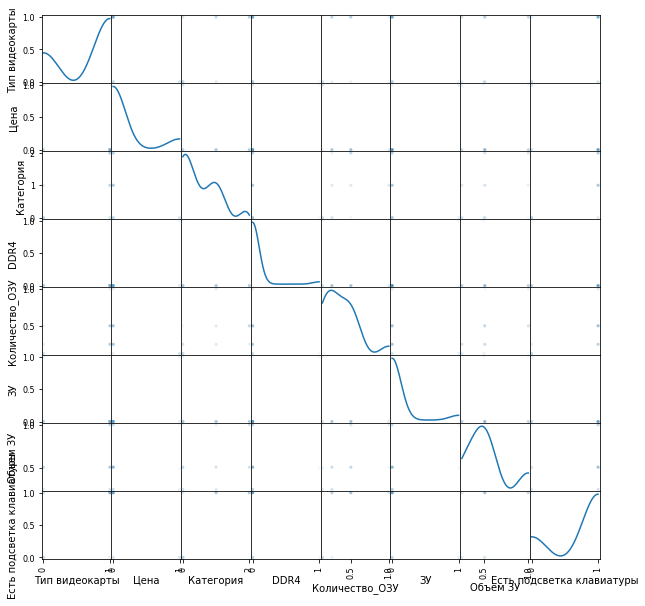

In [138]:
from pandas.plotting import scatter_matrix
scatter_matrix(ds[col], alpha=0.05, figsize=(10, 10), diagonal='kde');

Text(0, 0.5, 'Количество_ОЗУ')

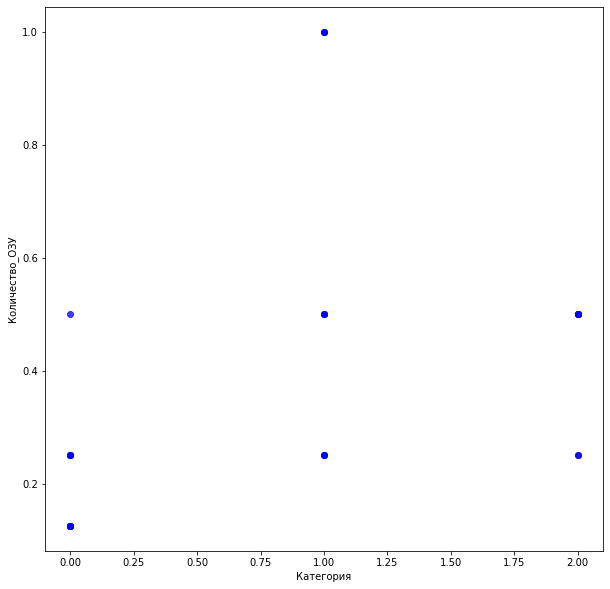

In [134]:
column1 = 'Категория'
column2 = 'Количество_ОЗУ'
dts = ds[col]
plt.figure(figsize=(10, 10))
plt.scatter(dts[column1], dts[column2], alpha=0.75, color='blue')
plt.xlabel(column1)
plt.ylabel(column2)

In [113]:
# Нормализация
from sklearn import preprocessing
norm = preprocessing.MinMaxScaler().fit_transform(ds[col].values)

In [139]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
data_dist = pdist(norm, 'cityblock')
data_linkage = linkage(data_dist, method='average')
print(data_linkage)

[[16.         17.          0.          2.        ]
 [20.         22.          0.          2.        ]
 [21.         23.          0.          2.        ]
 [14.         15.          0.          2.        ]
 [24.         25.          0.          2.        ]
 [26.         32.          0.          3.        ]
 [27.         33.          0.          4.        ]
 [18.         19.          0.          2.        ]
 [ 6.          7.          0.          2.        ]
 [ 0.          1.          0.14285714  2.        ]
 [29.         30.          0.28571429  4.        ]
 [10.         11.          0.34408602  2.        ]
 [12.         13.          0.48694316  2.        ]
 [ 2.          4.          0.5         2.        ]
 [28.         31.          0.62980031  4.        ]
 [34.         38.          0.79877112  8.        ]
 [39.         42.          0.81490015  6.        ]
 [ 5.         41.          0.82142857  3.        ]
 [ 3.         45.          0.98694316  4.        ]
 [37.         40.          1.24

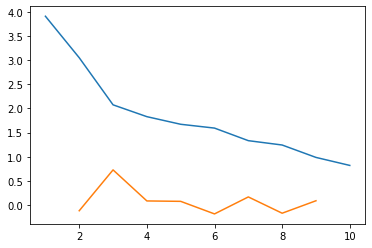

Рекомендованное количество кластеров: 3


In [115]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2
print("Количество кластеров:", k)

In [ ]:
from scipy.cluster.hierarchy import fcluster
cls=fcluster(data_linkage, k, criterion='maxclust')
cls

In [182]:
col

['Тип видеокарты',
 'Цена',
 'Категория',
 'DDR4',
 'Количество_ОЗУ',
 'ЗУ',
 'Объем ЗУ',
 'Есть подсветка клавиатуры']

In [ ]:
first_param=2
second_param=4
plt.figure(figsize=(10, 8))
plt.scatter(norm[:,first_param], norm[:,second_param], c=cls, cmap='flag')
plt.xlabel(col[first_param])
plt.ylabel(col[second_param])
plt.show()

